
#**LetsGrowMore Data Science Internship (VIP)**

**Preeti Sahani**

**Title: Prediction using Decision Tree  Algorithm**

#**1. Import Library**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#**2. Load data**

In [ ]:
Dataset = pd.read_csv("/content/Iris.csv")

#**3. Undestanding the data**

In [ ]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
Dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
Dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
Dataset.Species.value_counts()

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: Species, dtype: int64

#**4. Data Pre processing**

In [ ]:
Dataset = Dataset.drop(['Id'], axis =1)

In [ ]:
Dataset = Dataset.replace(to_replace = {"Species":{"Iris-versicolor":0, "Iris-versicolor":1, "Iris-virginica":2}})
Dataset.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


change data tpe of class attribut to category

In [ ]:
Dataset["Species"] = Dataset["Species"].astype("category").cat.codes

#**5. Explantory data analysis**

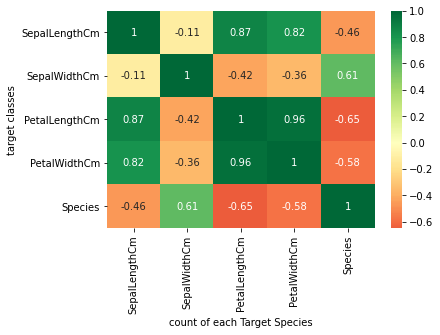

In [ ]:
sns.heatmap(Dataset.corr(), annot = True, cmap = 'RdYlGn', center = 0)
plt.ylabel('target classes')
plt.xlabel('count of each Target Species')
plt.show()

#**6.Model Building**

In [ ]:
x = Dataset.drop(['Species'], axis = 1)
y = Dataset['Species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [ ]:
#Create an instance and fit the model
decmodel = DecisionTreeClassifier(criterion = 'gini', random_state = 0)

In [ ]:
#Fitting the train and test data
decmodel.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
y_pred = decmodel.predict(x_test)
predicted = y_pred
actual = y_test
score_lr = accuracy_score(y_test, y_pred)
print("Accucac \t", score_lr)
results = confusion_matrix(actual, predicted)
print('confusion matrix \n', results)

Accucac 	 0.9111111111111111
confusion matrix 
 [[14  4  0]
 [ 0 11  0]
 [ 0  0 16]]


In [ ]:
feature_names = Dataset.columns[:4]
target_names = Dataset['Species'].unique().tolist()
arget_names = ['0','1','2']
feature_names

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [ ]:
print('Classification Report\n', classification_report(y_test, y_pred))

Classification Report
               precision    recall  f1-score   support

           0       1.00      0.78      0.88        18
           1       0.73      1.00      0.85        11
           2       1.00      1.00      1.00        16

    accuracy                           0.91        45
   macro avg       0.91      0.93      0.91        45
weighted avg       0.93      0.91      0.91        45



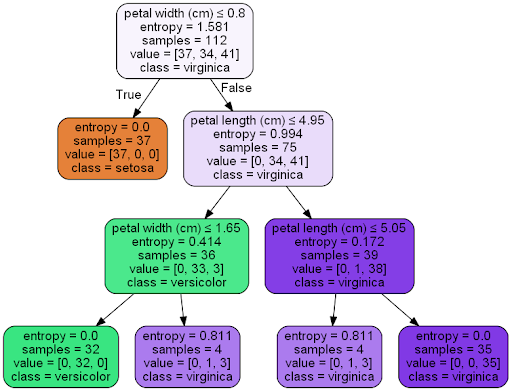

#**Conclusion**

The developed model properly classified both of the classes of target variable. Even for the minority class, the f1 score was 0.91. It means that this model has learned to predict the employee Attrition very well.